# Method of Images - 3/22/18 

In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
N = 50
x_start,x_end,y_start,y_end = -2.0,2.0,-1.0,1.0
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)

### Source Near Plane Wall

In [8]:
class Source:
    
    def __init__(self,strength,x,y):
    
        '''
        location and strength of each source
    
        strength: float
            strength of the source
        x: float
            x location of the source
        y: float
            y location of the source
        
        '''
    
        self.strength = strength
        self.x = x
        self.y = y
    
    def velocity(self,X,Y):
    
        '''
        Computes velocity field
    
        X : 2D numpy array of floats
            x_coordinates of mesh points
        
        Y : 2D numpy array of floats
            y_coordinates of mesh points
        '''
    
        self.u = self.strength/(2*np.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2*np.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
    
    def streamfunc(self,X,Y):
    
        '''
        Computes stream function of the singularity
        '''
        self.psi = self.strength/(2*np.pi)*np.arctan(Y-self.y,X-self.x)
    

In [9]:
"""
sigma = np.ones(N) #strength of source

x_source = np.linspace(-5.0,5.0,N)
y_source = np.zeros(N)

#create a source (object of class source)

source = np.empty(N,dtype=Source)
sourcesu = 0
sourcesv = 0

for i in range(len(sigma)):
    source[i] = Source(sigma[i],x_source[i],y_source[i])
    source[i].velocity(X,Y)
    source[i].streamfunc(X,Y)
    
    sourcesu = sourcesu+source[i].u
    sourcesv = sourcesv+source[i].v   
    """

'\nsigma = np.ones(N) #strength of source\n\nx_source = np.linspace(-5.0,5.0,N)\ny_source = np.zeros(N)\n\n#create a source (object of class source)\n\nsource = np.empty(N,dtype=Source)\nsourcesu = 0\nsourcesv = 0\n\nfor i in range(len(sigma)):\n    source[i] = Source(sigma[i],x_source[i],y_source[i])\n    source[i].velocity(X,Y)\n    source[i].streamfunc(X,Y)\n    \n    sourcesu = sourcesu+source[i].u\n    sourcesv = sourcesv+source[i].v   \n    '

In [11]:
sigma = 1.0
x_source,y_source = 0.0,0.5

#creating a source (object of class source)
source = Source(sigma,x_source,y_source)
source.velocity(X,Y)
source.streamfunc(X,Y)

# create the mirror image of the source and computes velocity and stream-function
source_image = Source(sigma, x_source, -y_source)
source_image.velocity(X, Y)
source_image.streamfunc(X, Y)

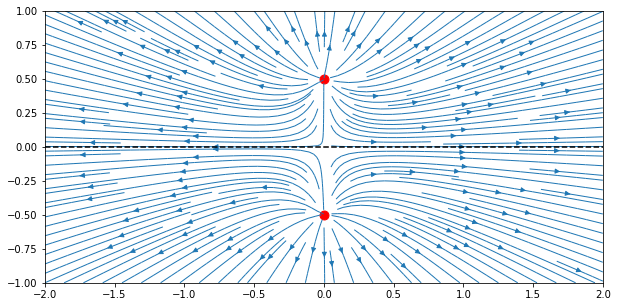

In [17]:
u = source.u + source_image.u
v = source.v + source_image.v
psi = source.psi + source_image.psi

width = 10
height = (y_end-y_start)/(x_end-x_start) * width
plt.figure(figsize=(width,height))
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.streamplot(X,y,u,v,density = 2, linewidth=1)
plt.scatter(source.x,source.y,s=80,color = 'r')
plt.scatter(source_image.x,source_image.y,s=80,color='r')
plt.axhline(0.,color='k',linestyle = '--')

### Vortex Near Plane Wall

In [20]:
class Vortex:
    """
    Contains information related to a vortex.
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the vortex.
        
        Parameters
        ----------
        strength: float
            Strength of the vortex.
        x: float
            x-coordinate of the vortex.
        y: float
            y-coordinate of the vortex.
        """
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by a vortex.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.u = (+self.strength / (2 * np.pi)*(Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        self.v = (-self.strength / (2 * np.pi)*(X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        
    def streamfunc(self, X, Y):
        """
        Computes the stream-function generated by a vortex.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.psi = (-self.strength / (4 * np.pi)*np.log((X - self.x)**2 + (Y - self.y)**2))

In [23]:
gamma = 1.0
x_vortex,y_vortex = 0.0,0.5

vortex = Vortex(gamma,x_vortex,y_vortex)
vortex.velocity(X,Y)
vortex.streamfunc(X,Y)

vortex_image = Vortex(-gamma,x_vortex,-y_vortex)
vortex_image.velocity(X,Y)
vortex_image.streamfunc(X,Y)

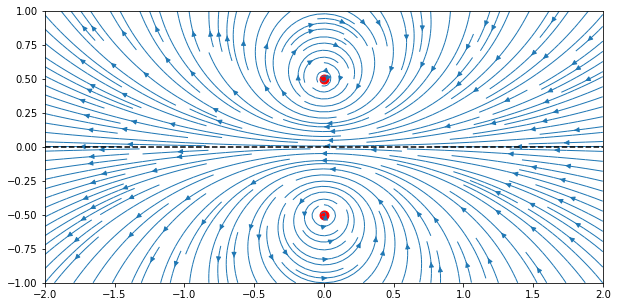

In [25]:
u = vortex.u + vortex_image.u
v = vortex.v + vortex_image.v
psi = vortex.psi + vortex_image.psi

width = 10
height = (y_end-y_start)/(x_end-x_start) * width
plt.figure(figsize=(width,height))
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.streamplot(X,y,u,v,density = 2, linewidth=1)
plt.scatter(vortex.x,vortex.y,s=80,color = 'r')
plt.scatter(source_image.x,source_image.y,s=80,color='r')
plt.axhline(0.,color='k',linestyle = '--')

### Vortex Pair Near the Ground

In [26]:
x_vortex1,y_vortex1 = -0.1,0.5
x_vortex2,y_vortex2 = 0.1,0.5

vortex1 = Vortex(gamma, x_vortex1,y_vortex1)
vortex1.velocity(X,Y)
vortex1.streamfunc(X,Y)

vortex2 = Vortex(-gamma, x_vortex2,y_vortex2)
vortex2.velocity(X,Y)
vortex2.streamfunc(X,Y)

vortex1_image = Vortex(-gamma, x_vortex1,-y_vortex1)
vortex1_image.velocity(X,Y)
vortex1_image.streamfunc(X,Y)

vortex2_image = Vortex(gamma, x_vortex2,-y_vortex2)
vortex2_image.velocity(X,Y)
vortex2_image.streamfunc(X,Y)

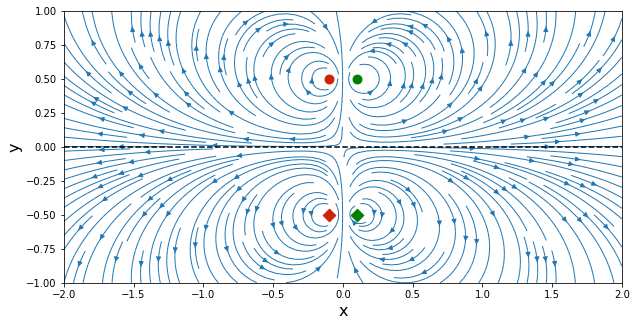

In [28]:
u = vortex1.u + vortex2.u + vortex1_image.u + vortex2_image.u
v = vortex1.v + vortex2.v + vortex1_image.v + vortex2_image.v
psi = vortex1.psi + vortex2.psi + vortex1_image.psi + vortex2_image.psi

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.streamplot(X, Y, u, v, density=2, linewidth=1)
plt.scatter(vortex1.x, vortex1.y, color='#CD2305', s=80, marker='o')
plt.scatter(vortex2.x, vortex2.y, color='g', s=80, marker='o')
plt.scatter(vortex1_image.x, vortex1_image.y, color='#CD2305', s=80, marker='D')
plt.scatter(vortex2_image.x, vortex2_image.y, color='g', s=80, marker='D')
plt.axhline(0.0, color='k', linestyle='--');